In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from rgb2gray import rgbtogray

In [26]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = np.round (0.2989 * r + 0.5870 * g + 0.1140 * b)
    return gray

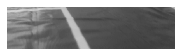

In [27]:
I=Image.open('466.jpg')
I=np.array(I)
I=rgbtogray(I)
I=I.astype(int)
fig1=plt.figure(figsize = (3,3))
plt.imshow(I, cmap='gray',vmin=0,vmax=255);
plt.axis('off');

In [32]:
##### Otsu multithreshold method
mini=np.amin(I)
maxi=np.amax(I)-1
pi, bins,=np.histogram(I.ravel(), np.arange(256))
pi=pi/np.sum(pi)
bins = np.linspace(0,255,255)
miu_t=np.sum(bins*pi) 
t0=1
t1=2
w=np.zeros((2))
miu_k=np.zeros((2))
sgmt=0
opt_t=np.zeros((2))
for t0 in range(mini,maxi-1):
    for t1 in range(t0+1,maxi):
        w[0]=np.sum(pi[mini:t0])+0.000001
        w[1]=np.sum(pi[t1:maxi])+0.000001
        miu_k[0]=np.sum(bins[mini:t0]*pi[mini:t0])/w[0]
        miu_k[1]=np.sum(bins[t1:maxi]*pi[t1:maxi])/w[1]
        sgm= np.sum(w*(miu_k-miu_t)**2) 
        if sgm>sgmt:
            sgmt=sgm
            opt_t[0]=t0
            opt_t[1]=t1

opt_t[0]=opt_t[0]+mini
opt_t[1]=opt_t[1]+mini
print(opt_t)


[203. 244.]


(150, 600)


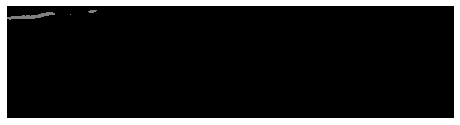

In [33]:
##### Otsu method
si=I.shape
S=np.zeros(si)
print(S.shape)
for x in range(si[0]):
    for y in range(si[1]):
        if I[x,y]<=opt_t[0]:
            S[x,y]=0
        elif (I[x,y]>opt_t[0]) & (I[x,y]<=opt_t[1]) :
            S[x,y]=128
        else:
            S[x,y]=255
S=S.astype(int)
fig2=plt.figure(figsize = (8,8))
plt.imshow(S, cmap='gray',vmin=0,vmax=255);
plt.axis('off');   

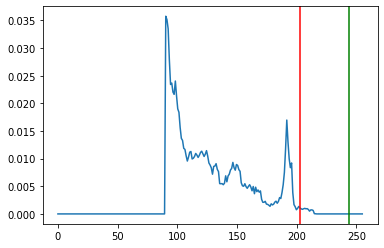

In [34]:
plt.plot(bins,pi)
plt.axvline(opt_t[0],0,1,label='pyplot vertical line', c = 'r')
plt.axvline(opt_t[1],0,1,label='pyplot vertical line', c = 'g')
plt.show()
